In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [197]:
df_train = pd.read_csv('train.csv')

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [199]:
corrmat = df_train.corr()

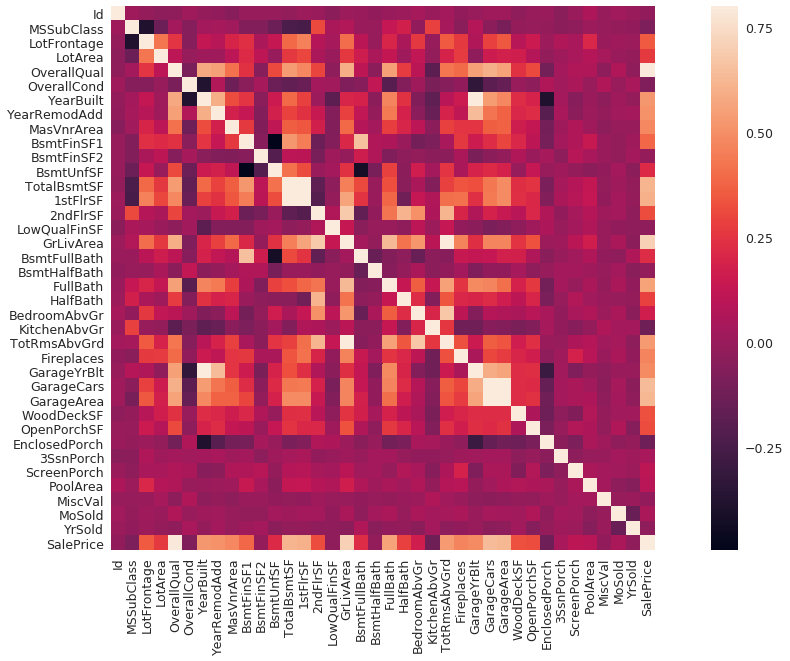

In [200]:
f ,ax = plt.subplots(figsize = (20,10))
sns.heatmap(corrmat,vmax=.8,square=True)

In [201]:
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

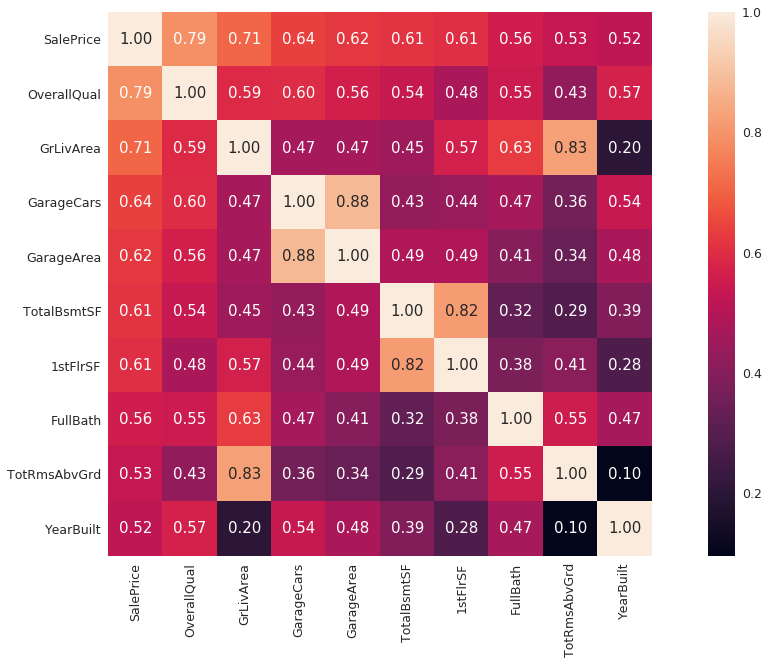

In [202]:
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)#font size in graph
f,ax = plt.subplots(figsize = (20,10))#setting size of graph
hm = sns.heatmap(cm,cbar = True,annot=True,square=True,fmt = '.2f',yticklabels=cols.values,xticklabels=cols.values)
#annot for getting corresponding values on graph
plt.show()

In [203]:
total=df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [204]:
df_train = df_train.drop(missing[missing['Total'] > 100].index,1)


In [205]:
df_train.isnull().sum().max()

81

In [206]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [207]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [208]:
train_l = df_train.select_dtypes(exclude = [np.number])
train_l.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [209]:
from sklearn import preprocessing
for x in train_l.columns:
    df_train[x].fillna(np.nan,inplace=True)	#use label Encoding to handle strings
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df_train[x].values))
    df_train[x] = lbl.transform(list(df_train[x].values))

In [210]:
from sklearn.preprocessing import Imputer
df_train['GarageCond'].fillna(df_train['GarageCond'].median(),inplace=True)
df_train['GarageType'].fillna(df_train['GarageType'].median(),inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].median(),inplace=True)
df_train['GarageQual'].fillna(df_train['GarageQual'].median(),inplace=True)
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].median(),inplace=True)
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].median(),inplace=True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].median(),inplace=True)
df_train['BsmtCond'].fillna(df_train['BsmtCond'].median(),inplace=True)
df_train['BsmtQual'].fillna(df_train['BsmtQual'].median(),inplace=True)
df_train['MasVnrType'].fillna(df_train['MasVnrType'].median(),inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median(),inplace=True)
df_train['Electrical'].fillna(df_train['Electrical'].median(),inplace=True)

In [211]:
total=df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
df_train.isnull().sum().max()

0

In [212]:
df_test = pd.read_csv('test.csv')

In [213]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [214]:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
miss = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
miss.head(30)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [215]:
df_test = df_test.drop(miss[miss['Total']>100].index,1)

In [216]:
df_test.isnull().sum().max()

78

In [217]:
test_l = df_test.select_dtypes(exclude = [np.number])
test_l.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [218]:
from sklearn import preprocessing
for x in test_l.columns:
    df_test[x].fillna(np.nan,inplace=True)	#use label Encoding to handle strings
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df_test[x].values))
    df_test[x] = lbl.transform(list(df_test[x].values))

In [219]:
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(),inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].median(),inplace=True)
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].median(),inplace=True)
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].median(),inplace=True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].median(),inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].median(),inplace=True)
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].median(),inplace=True)
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].median(),inplace=True)
df_test['GarageCars'].fillna(df_test['GarageCars'].median(),inplace=True)
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].median(),inplace=True)

In [220]:
df_test.isnull().sum().max()

0

In [221]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
data = df_train
y = df_train['SalePrice']
del data['SalePrice']
x = data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


In [222]:
from sklearn.ensemble import GradientBoostingRegressor
predict = GradientBoostingRegressor()
#predict.fit(x_train,y_train)
#prediction = predict.predict(x_test)
#print(r2_score(y_test,prediction))

In [223]:
from xgboost.sklearn import XGBRegressor
clf=XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)

In [224]:
del df_train['Id']
m = df_test['Id']
del df_test['Id']

In [225]:
clf.fit(x,y)
prediction = clf.predict(df_test)

In [226]:
import csv
with open('result.csv','w') as f:
    writer = csv.writer(f)
    col = ['Id','SalePrice']
    writer.writerow(col)
    
    for z,vc  in  zip(m,prediction):
        writer.writerow([z,vc])
    

In [227]:
from xgboost.sklearn import XGBRegressor
clf=XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.05,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42,
                       silent=1)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)
print(r2_score(y_test,prediction))

0.916032412691
